In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

In [92]:
data= pd.read_csv('NIFTY50.csv')

Plotting Whole Chart To Show The Variation Of Index Prices

<Axes: xlabel='Days Since 1st January 2013', ylabel='Stock Price'>

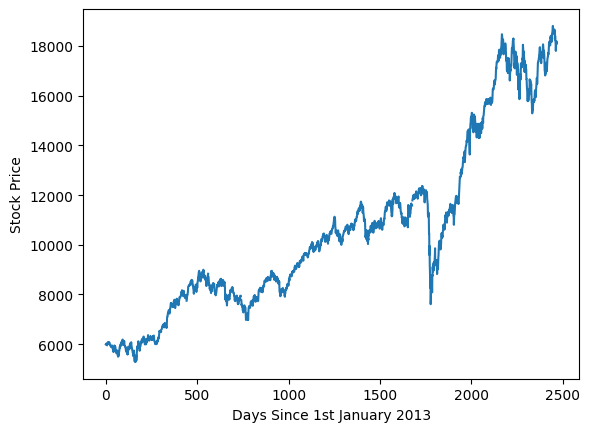

In [93]:
data.loc[:,'Close'].plot(xlabel='Days Since 1st January 2013',ylabel="Stock Price")

Creating A New Column Of LogReturn In The DataFrame

In [94]:
data['LogReturn'] = np.log(data['Close']).shift(-1) - np.log(data['Close'])

Trying to model the index price variation using actual histogram vs normal distribution

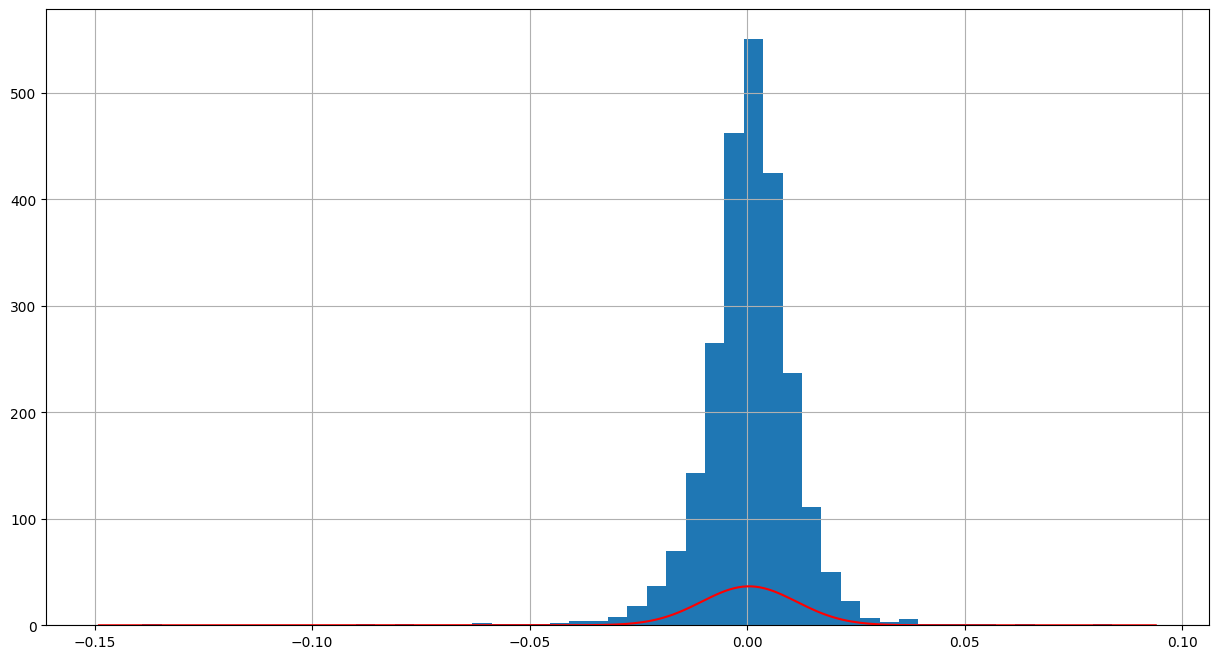

In [95]:
mu = data['LogReturn'].mean() # mean of log returns
sigma = data['LogReturn'].std(ddof=1) # deviation of log returns

density = pd.DataFrame()
density['x'] = np.arange(data['LogReturn'].min()-0.01, data['LogReturn'].max()+0.01, 0.001)
# the 'x' is the range of values from minimum value of log returns (-0.01) to maximum value of log returns (+0.01)
# with a step size of 0.001, the 0.01 addition and removal is done to provide a little margin around the data ramge.
density['pdf'] = norm.pdf(density['x'], mu, sigma) 
# the density['pdf'] contains the values in the probability density function of a normal distribution
# corresponding to 'x' which is mentioned above.

data['LogReturn'].hist(bins=50, figsize=(15, 8)) # plotting the values of log returns!
plt.plot(density['x'], density['pdf'], color='red') # plotting the normal distribution!
plt.show()

Let's find out if the daily returns are biased towards positive returns or negative returns.

In [96]:
prob0 = norm.cdf(0,mu,sigma)
print("The prob that index will lose something is", prob0)

# slight bias of gaining something daily.

The prob that index will lose something is 0.4834619999866514


Let Us Find Out If Our Index Will Lose Ever Lose Over, Let's Say 5% In A Day

In [156]:
prob5 = norm.cdf(-0.0,mu,sigma)
print("The probability that the index will lose over 5% in a day is ",prob5*100,"%")

# One can see that the probability is 0.0002, which is negligible

# similar analysis can be done for weekly updated or monthly updated data for long term results.

The probability that the index will lose over 5% in a day is  48.34619999866514 %


In [194]:
mu365 = mu*1000
sigma365 = (1000**0.5)*sigma
print("The probability that the index will lose over 5% in an year is", norm.cdf(-0.0,mu365,sigma365))


The probability that the index will lose over 5% in an year is 0.09488060740074938


Finding out the probability that the index will gain over 5% in an year

In [205]:
mu365 = mu*1000
sigma365 = (1000**0.5)*sigma
print("The probability that the index will gain over 5% in 1000 days is", 1- norm.cdf(0.05,mu365,sigma365))


The probability that the index will gain over 5% in an year is 0.8782468017238563


Calculating Value At Risk (VaR)

In [99]:
# VaR basically tells us with some probability that the index daily returns is worse than xyz %

In [209]:
var = norm.ppf(0.05,mu,sigma)
var
# there is 5% chance that the daily returns is worse than -1.7% = 5% quantile (5% of the data lie below -1.7%)
# or we are 95% sure that the daily returns is better than -1.7%

-0.017481748046326497

In [101]:
# finding the 50% quantile of the data
var95 = norm.ppf(0.50,mu,sigma)
var95

# there is 50% chance that the daily returns are worse than 0%. you expect the daily returns to be centered around 0.

0.0004521097065548405

Estimating the average return using Confidence Intervals

In [210]:
# Lets build 90% confidence interval for log return
sample_size = data['LogReturn'].shape[0] # n data points
sample_mean = data['LogReturn'].mean() # mean of the population
sample_std = data['LogReturn'].std(ddof=1) / sample_size**0.5
# standard deviation of the population divided by sqrt(n) gives the standard deviation of sample.

# left and right quantile # 90% confidence interval means, 1-a = 0.9 (area % as fraction)
# which gives a = 0.1, so a/2 is 0.05 and 1-a/2 is 0.95

z_left = norm.ppf(0.05) # left quantile score
z_right = norm.ppf(0.95) # right quantile score
z = z_right
# also, z = abs(z_left)

# upper and lower bounds
interval_left = sample_mean - sample_std*z
interval_right = sample_mean + sample_std*z


In [213]:
# 90% confidence interval tells you that there will be 90% chance that the average stock return lies between "interval_left"
# and "interval_right".

print('There is 90% chance of return lies between', (interval_left*100, interval_right*100),"%")

There is 90% chance of return lies between (0.009118785575917778, 0.08130315573505031) %


Skipping Hypothesis Testing (Boring AF)

In [104]:
# Now we will do association of random variables to get to know if one variable depends on another variable or not!
# covariance or correlation is used in statistics to measure the association of one variable with another
# but to get to know the relation between multiple variables, we will use linear regression.

In [109]:
# to get the covariance and correlation between multiple variables of a dataset.
# we can use
# data.corr() & data.cov() to get the covariance or correlation matrix
# to get the scatter matrix: pd.plotting.scatter_matrix(data)

In [145]:
# we can use multiple linear regression to estimate the dependence of one indice on other
# or plot scatter plot to see that. 
# or get correlation matrix.